# 2nd Derivative weighted loss function

Notebook exploring the development of a loss function that is weighted based on the second derivative.  

The second derivative has a large negative value at the stick -> slip transition and large positive value at the slip -> stick transition. A loss function weighted by the second derivative (with possible seperate weightings dependent on whether it is positive or negative) should help any ML model to prioritise learning to accurately forecast start and end of failures.

## Setup

In [1]:
# Import libraries
import sys
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import local_paths # TODO work out how to use utils.paths instead

# Change local path
sys.path.append(local_paths.MAIN_DIRECTORY)

# Import local modules
from utils.dataset import SlowEarthquakeDataset
import scripts.general_functions as gfn

host597.jc.rl.ac.uk


In [2]:
# Set random seed
SEED = 17 # random seed for the dataset and model
gfn.set_seed(SEED)

# Set torch device
device = gfn.set_torch_device()

No GPU available.


## Load data

In [3]:
# Import data
EXP = "p4679"

dataset = SlowEarthquakeDataset([EXP])
df = SlowEarthquakeDataset.convert_to_df(dataset, EXP)

df

,obs_shear_stress,obs_normal_stress,obs_ecdisp,time
0,5.091520,6.986740,22107.1104,0.000
1,5.090652,6.988410,22109.7823,0.001
2,5.089989,6.986299,22103.7900,0.002
3,5.089492,6.985970,22109.2161,0.003
4,5.088243,6.987547,22108.5900,0.004
...,...,...,...,...
301716,4.979753,6.987299,25641.7379,301.716
301717,4.979841,6.988011,25642.8180,301.717
301718,4.980150,6.988861,25646.0429,301.718
301719,4.979985,6.990632,25639.8351,301.719


Text(0.5, 1.0, 'Raw Shear Stress Data, p4679')

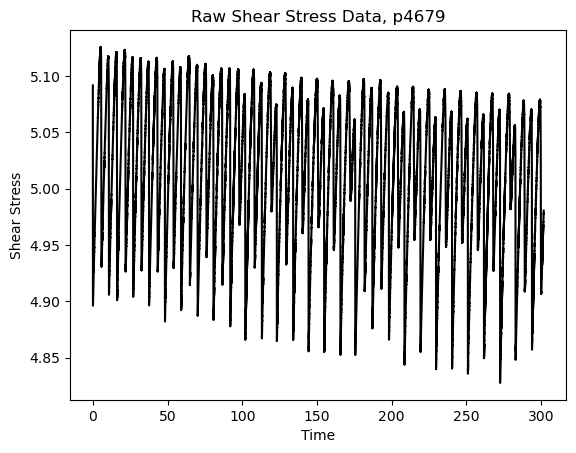

In [4]:
# Visualise data
plt.plot('time', 'obs_shear_stress', 'k', data=df)
plt.xlabel("Time")
plt.ylabel("Shear Stress")
plt.title(f"Raw Shear Stress Data, {EXP}")


In [5]:
# Downsampling
DS_FACTOR = 1e2


df_ds = df.rolling(window=int(DS_FACTOR), step=int(DS_FACTOR)).mean()

## Calculate derivates

In [15]:
# Calculate first derivative
# np.gradient calculates average difference to adjacent points
df[] = np.gradient(df["obs_shear_stress"])
test


array([-8.6757e-04, -7.6534e-04, -5.8022e-04, ...,  7.1835e-05,
        1.1328e-04,  3.9234e-04])

In [ ]:
# Calculate second derivative